# TripAdvisor

Data has been collected from TripAdvisor.com where reviews on destinations in 10 categories are considered. Each traveler rating is mapped as Excellent (4), Very Good (3), Average (2), Poor (1), and Terrible (0) and average rating is used against each category per user.

* Attribute 1 : Unique user id
* Attribute 2 : Average user feedback on art galleries
* Attribute 3 : Average user feedback on dance clubs
* Attribute 4 : Average user feedback on juice bars
* Attribute 5 : Average user feedback on restaurants
* Attribute 6 : Average user feedback on museums
* Attribute 7 : Average user feedback on resorts
* Attribute 8 : Average user feedback on parks/picnic spots
* Attribute 9 : Average user feedback on beaches
* Attribute 10 : Average user feedback on theaters
* Attribute 11 : Average user feedback on religious institutions

**Task is to cluster the users based on the ratings they have left on Trip Advisor.**

# Import Libraries and Load Data

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ta_data = pd.read_csv('tripadvisor_review.csv')

In [3]:
ta_data.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


# Exploratory Data Analysis

In [4]:
ta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
User ID        980 non-null object
Category 1     980 non-null float64
Category 2     980 non-null float64
Category 3     980 non-null float64
Category 4     980 non-null float64
Category 5     980 non-null float64
Category 6     980 non-null float64
Category 7     980 non-null float64
Category 8     980 non-null float64
Category 9     980 non-null float64
Category 10    980 non-null float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


In [5]:
ta_data.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


No need to scale data as all variables, or categories, are in similar scale.

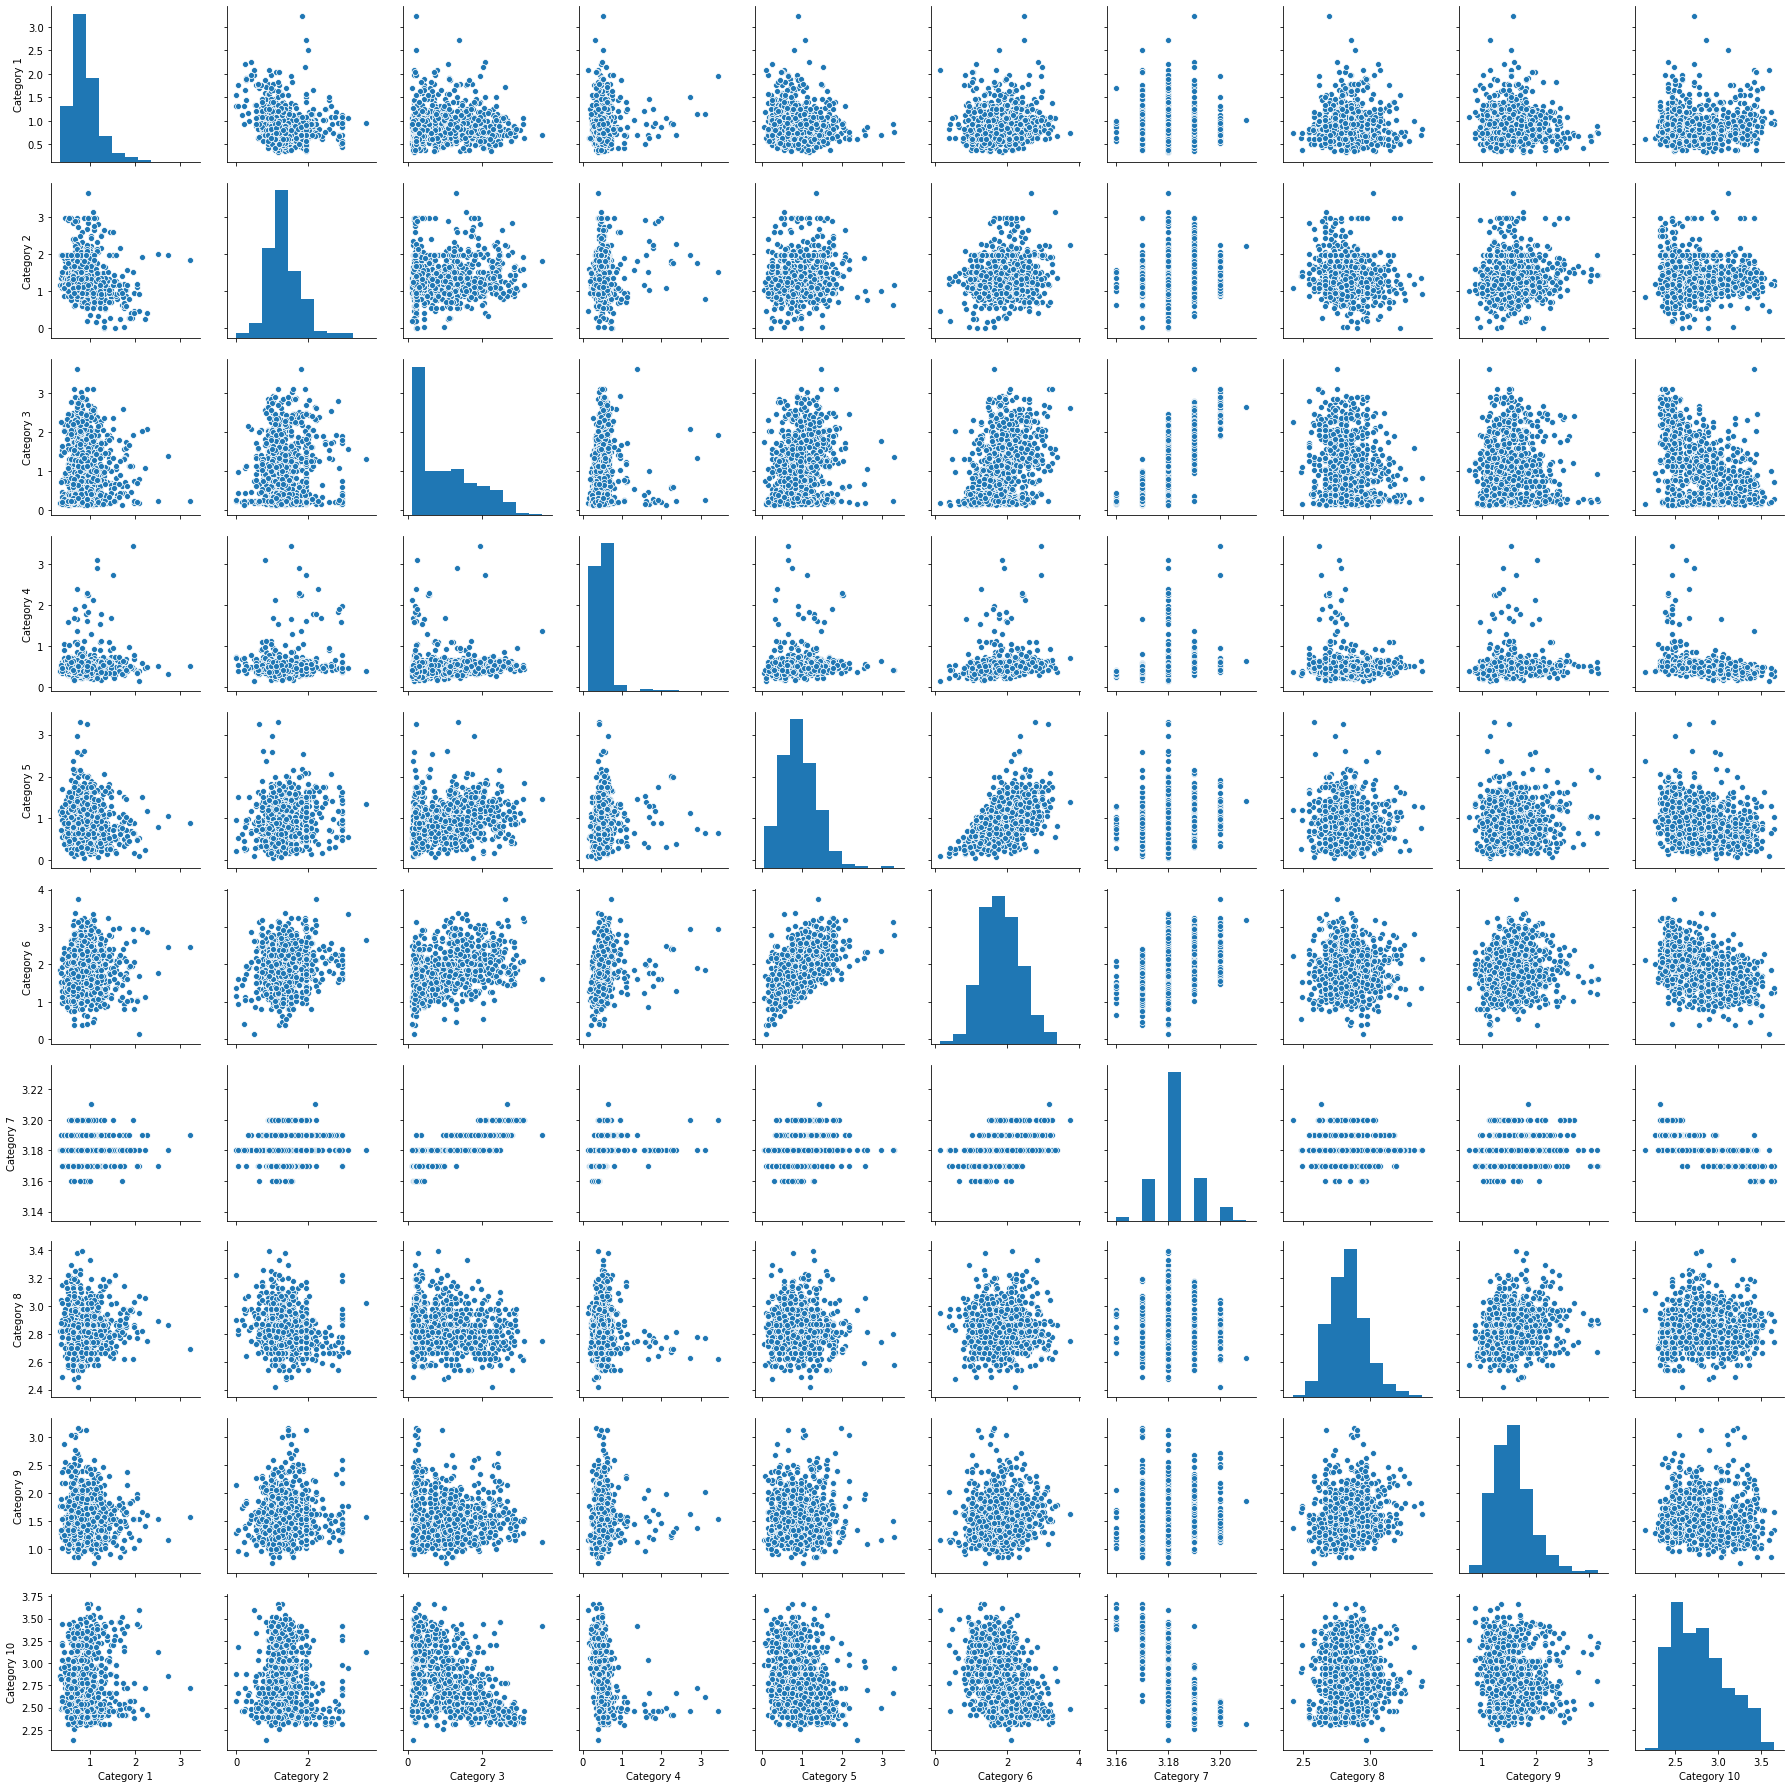

In [6]:
sns.pairplot(ta_data.drop('User ID', axis=1))

Not a ton of variation in the magnitude of the data. Aka solidifying our previous decision that StandardScaler() from sklearn.preprocessing is unnecessary.

# Build K-Means Model

In [7]:
from sklearn.cluster import KMeans

As opposed to KNN (supervised ML algo), K-Means is an *unsupervised* ML algo - means we only have X data, no y data. Won't need to use User ID column - drop it.

In [8]:
X = ta_data.drop('User ID', axis=1)
X.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [9]:
# start w 2 clusters THEN optimize 

kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)

In [10]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [11]:
prediction = kmeans.predict(X)

Within Cluster Sum of Squares (WCSS) is called inertia in the KMeans algorithm.

In [12]:
kmeans.inertia_

1179.753443277767

Silhouette score is in the metrics part of sklearn. It's a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). Metric is [-1,1]. 

- -1 = worst clustering
- +1 = best clustering

In [13]:
from sklearn import metrics
metrics.silhouette_score(X, prediction)

0.30085279300986595

Not too bad. Let's use the elbow method to determine optimum number of clusters.

In [14]:
wcss = [] # creating an empty list

for i in range(2,20): # for every value from 2 to 19:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    prediction=kmeans.predict(X)
    wcss.append(kmeans.inertia_)

In [15]:
wcss

[1179.753443277767,
 1052.368049076452,
 961.7293586936851,
 890.8560081544491,
 836.5250883421762,
 794.601792270213,
 754.1091004178468,
 717.8901645659531,
 688.2090939953679,
 669.8621997042228,
 639.5869717056352,
 627.8930027346497,
 607.0335346311413,
 590.5204347289473,
 580.8571894372267,
 570.0624960962442,
 555.5692613929723,
 542.4293830597309]

What does our wcss list show us?

>It shows our Within Cluster Sum of Squares for every cluster number from 2 to 19.

>As the number of clusters increase, the WCSS decreases.

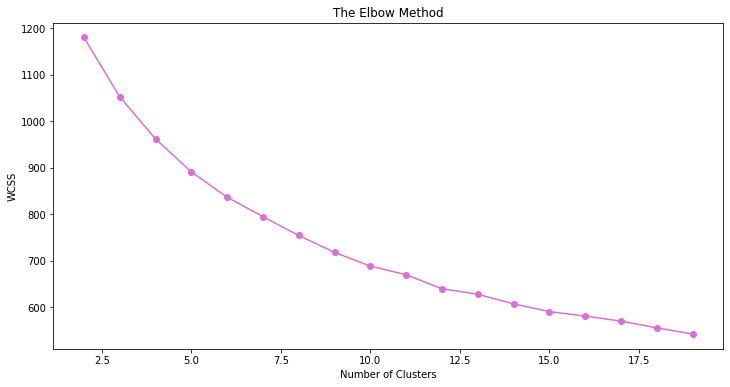

In [16]:
plt.figure(figsize=(12,6))
plt.plot(range(2, 20), wcss, marker='o', c='orchid')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Can't really tell the optimum cluster value from the elbow method. Let's visualize the silhouette scores. 

In [17]:
s_score = [] # create empty list

for i in range(2, 20): # for each value from 2 to 19:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    pred=kmeans.predict(X)
    s_score.append(metrics.silhouette_score(X, pred))

In [18]:
s_score

[0.30085279300986595,
 0.20456440205897788,
 0.16899844986359616,
 0.1660103130751055,
 0.16615045271655687,
 0.1612150028378932,
 0.16309353010534228,
 0.16377141573664328,
 0.16184112138737414,
 0.14404578915191002,
 0.16140579350176593,
 0.14720364282349374,
 0.1512115269996535,
 0.14435763607100624,
 0.1374958563740117,
 0.14836585497787186,
 0.13985329545502836,
 0.13938907657622357]

Similar to WCSS, the silhouette scores decrease as the number of clusters increase.

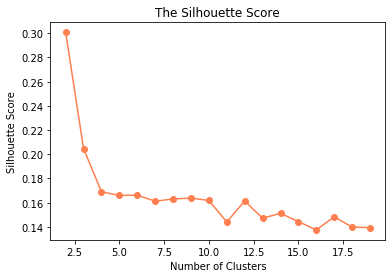

In [19]:
plt.plot(range(2, 20), s_score, marker='o', c='coral')
plt.title('The Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Silhouette score makes it a bit easier to identify the optimum number of clusters.

The silhouette plot shows that the silhouette coefficient was highest when **k = 2.5, suggesting that's the optimal number of clusters.**

In other words, the optimal number of clusters is when the Silhouette Score is the highest.

As we can't have half a cluster, **re-fit model with 3 clusters.**

In [20]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

Check out each cluster label:

In [21]:
kmeans.fit(X)
pred = kmeans.predict(X)
pred

array([0, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2,
       1, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2,
       2, 1, 1, 2, 1, 0, 1, 0, 2, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1,
       2, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 0, 2,
       0, 0, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1, 2, 2, 1, 1, 0,
       1, 2, 0, 2, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0,
       2, 1, 0, 1, 0, 1, 2, 0, 2, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 2, 2, 1, 0,
       1, 2, 0, 2, 1, 2, 2, 1, 0, 0, 2, 1, 0, 2, 1, 2, 0, 2, 0, 2, 2, 1,
       2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1,

Add the cluster labels to the ta_data.

In [22]:
ta_data['Cluster'] = pred
ta_data.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,Cluster
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,0
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,0
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,1
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,1
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,2


Check out how many users were assigned in each cluster.

In [23]:
ta_data['Cluster'].value_counts()

1    409
2    292
0    279
Name: Cluster, dtype: int64

Recreate the pairplot by using the 'Cluster' column as our hue. 

C:\Users\Morgan Kaiser\Anaconda3\Anaconda\New folder\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Morgan Kaiser\Anaconda3\Anaconda\New folder\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


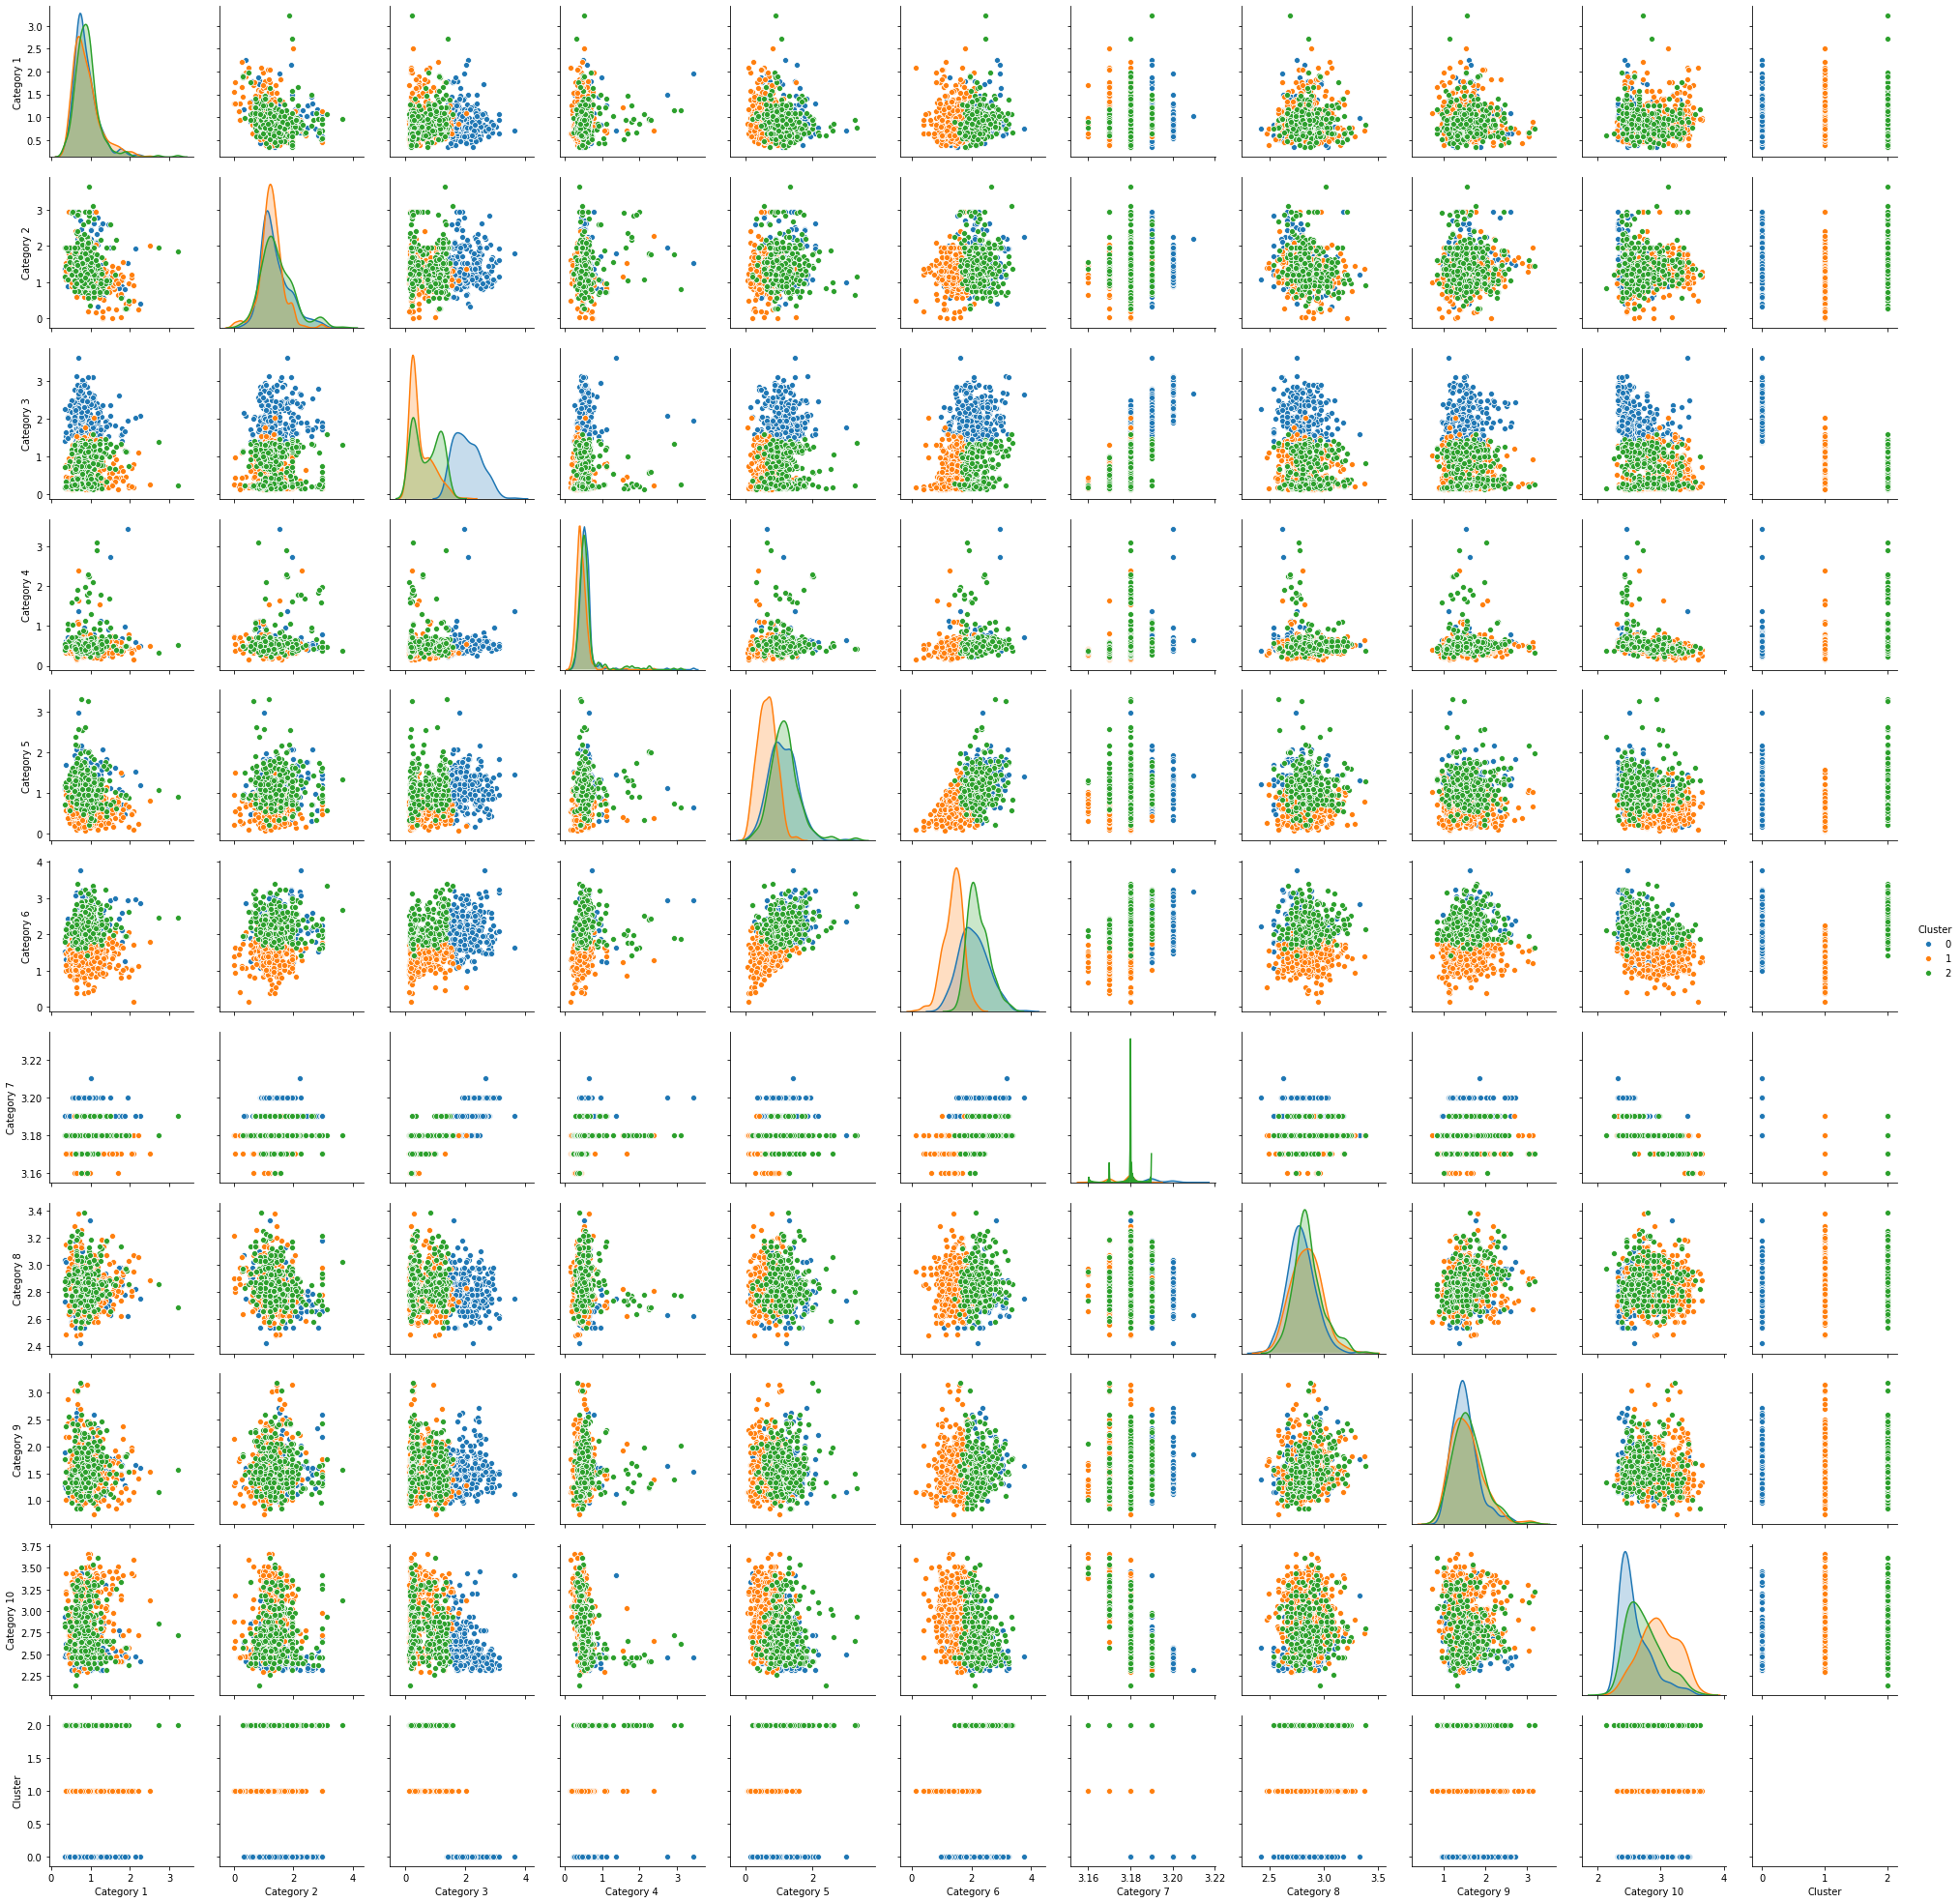

In [24]:
sns.pairplot(ta_data, hue="Cluster")

***
### Recommendations

Create a recommendation function that will take 2 User IDs (e.g. recommend("User 1", "User 2")) as input and will return "Yes" or "No" to the question on whether we can recommend the destinations User 2 likes to User 1.

In [25]:
# function taking in 2 arguments aka 2 userids
def user_recommendation(firstid, secondid):
    
    # first user ID
    row_firstuser = ta_data.loc[ta_data['User ID']==firstid]
    cluster_firstuser = row_firstuser['Cluster'].item()
    
    # second user ID
    row_seconduser = ta_data.loc[ta_data['User ID']==secondid]
    cluster_seconduser = row_seconduser['Cluster'].item()
        
    if cluster_firstuser == cluster_seconduser:
        return 'Yes'
    else:
        return 'No'

#### Question 1

For User 8, is it better to suggest the destinations User 28 likes or the destinations User 29 likes?

In [26]:
user_recommendation('User 8','User 28')

'No'

In [27]:
user_recommendation('User 8','User 29')

'Yes'

>**For User 8, it would be better to suggest destinations User 29 likes.**

#### Question 2

For User 11, is it better to suggest the destinations User 16 likes or the destinations User 28 likes?

In [34]:
user_recommendation('User 11','User 16')

'No'

In [35]:
user_recommendation('User 11','User 28')

'Yes'

>**For User 11, it would be better to suggest destinations User 28 likes.**

### Verification 

Our recommendations can be verified by manually checking which cluster each user is in. Remember the goal is to recommend destinations to users that similar users like. AKA recommend similar destinations to users who are in the same cluster. In other words, users that are clustered together are more similar to each other than to users in other clusters.

In [37]:
# question 1 verification
user = ['User 8', 'User 28', 'User 29']

for x in user:
    userid = ta_data.loc[ta_data['User ID']==x]
    cluster_user = userid['Cluster'].item()
    print(f'{x} is in cluster number: {cluster_user}')

User 8 is in cluster number: 1
User 28 is in cluster number: 2
User 29 is in cluster number: 1


In [36]:
# question 2 verification
user = ['User 11', 'User 16', 'User 28']

for x in user:
    userid = ta_data.loc[ta_data['User ID']==x]
    cluster_user = userid['Cluster'].item()
    print(f'{x} is in cluster number: {cluster_user}')

User 11 is in cluster number: 2
User 16 is in cluster number: 0
User 28 is in cluster number: 2
